In [0]:
import math
import numpy as np
from numpy.random import multivariate_normal, shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def generate_synthetic_2dpoints(mean, cov, npoints):
    points = multivariate_normal(mean, cov, npoints).T
    return points

In [0]:
# generate random covariance
def rcov(r=9):
    np.random.seed(r)
    x = np.random.uniform(-0.35, 0.35, size = (2, 2))
    x = np.dot(x, x.transpose())
    return x 

In [0]:
# generate synthetic data 
def gen_set1():
    # 2 clusters
    cov1 = [[0.02, 0], [0, 0.15]]
    cov2 = [[0.02, 0], [0, 0.25]]
    
    means = [[-1.00, +1.10], 
             [+0.25, -0.75]]
    cov = [cov1, rcov()]

    npoints = [75, 90]
       
    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    pa = np.hstack((p1, p2))
    pa = pa.T
    
    # 3 clusters
    means = [[-0.50, -0.00], 
             [+1.65, -1.50], 
             [+1.50, +0.50]]
    cov = [cov1, rcov(), rcov()]
    npoints = [40, 60, 70]

    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    p3 = generate_synthetic_2dpoints(means[2], cov[2], npoints[2])
    pb = np.hstack((p1, p2, p3))
    pb = pb.T

    # 4 clusters
    means = [[+1.70, -1.15], 
             [+2.15, +1.10], 
             [-1.20, +1.50],
             [-1.20, -0.2]]
    cov = [rcov() for i in range(4)]
    npoints = [50, 75, 60, 95]

    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    p3 = generate_synthetic_2dpoints(means[2], cov[2], npoints[2])
    p4 = generate_synthetic_2dpoints(means[3], cov[3], npoints[3])
    pc = np.hstack((p1, p2, p3, p4))
    pc = pc.T


    # 5 clusters 
    means = [[-2.1, -1.5], 
             [-2.5, +1.5], 
             [+1.8, -1.6],
             [+2.3, +1.7],
             [+0.1, +0.1]]

    cov = [cov1, rcov(), rcov(), cov2, rcov()]
    npoints = [90, 55, 70, 40, 60]
    p1 = generate_synthetic_2dpoints(means[0], cov[0], npoints[0])
    p2 = generate_synthetic_2dpoints(means[1], cov[1], npoints[1])
    p3 = generate_synthetic_2dpoints(means[2], cov[2], npoints[2])
    p4 = generate_synthetic_2dpoints(means[3], cov[3], npoints[3])
    p5 = generate_synthetic_2dpoints(means[4], cov[4], npoints[4])
    pd = np.hstack((p1, p2, p3, p4, p5))
    pd = pd.T

    return [pa, pb, pc, pd]

In [0]:
# load 4 data sets of 2d points of clusters [2, 3, 4, 5] 
pointset = gen_set1()

samples1, samples2, samples3, samples4 = pointset[0], pointset[1], pointset[2], pointset[3]

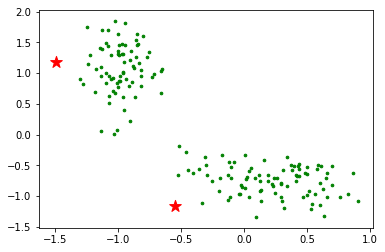

In [63]:
#Create random centroids
centroids = np.random.randn(2,2)

#Plot the samples1 dataset with random centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', s=150)
plt.scatter(samples1[:,0], samples1[:,1], c='g', s=7)

In [0]:
#Calculate shortest distance between 2 data points
def Euclidean_distance(one, two):

    squared_distance = 0
    
    for i in range(len(one)):

            squared_distance += ((one[i] - two[i])**2)

    ed = math.sqrt(squared_distance)

    return ed;

In [0]:
#Create 2 arrays for 2 data group
cluster1 = []
cluster2 = []

#Iterate over samples1 and determine cluster of each data point
for p, point in enumerate(samples1):
  
  current_distance = 0
  best_distance = 100
    
  for c, center in enumerate(centroids):

      current_distance = Euclidean_distance(point, center)
      if (current_distance < best_distance):
        best_distance = current_distance
        cluster_index = c
  if (cluster_index == 0):
    cluster1.append(point)
  if (cluster_index == 1):
    cluster2.append(point)

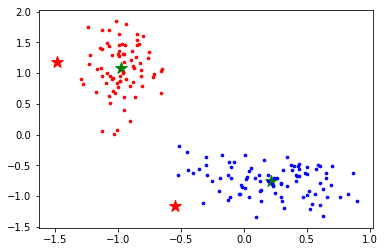

In [80]:
#Convert tuples to numpy array to plot them
cluster1 = np.asarray(cluster1)
cluster2 = np.asarray(cluster2)

#Calculate the mean of clusters
mean1 = np.mean(cluster1, axis = 0)
mean2 = np.mean(cluster2, axis = 0)

#Plot the means, centroids and determined clusters in different colors
plt.scatter(mean1[0], mean1[1], marker='*', c='g', s=150)
plt.scatter(mean2[0], mean2[1], marker='*', c='g', s=150)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', s=150)
plt.scatter(cluster1[:,0], cluster1[:,1], c='b', s=7)
plt.scatter(cluster2[:,0], cluster2[:,1], c='r', s=7)